In [1]:
import torch
from dpp_nets.my_torch.simulator import SimKDPP
from dpp_nets.my_torch.simulator import SimFilter

from dpp_nets.helper.plotting import plot_floats

In [2]:
# Learning a kDPP

# Initialization
network_params = {'set_size': 40, 'n_clusters': 10}
dtype = torch.DoubleTensor
train_it = 6000
batch_size = 10
lr = 1e-5
alpha_iter = 4

torch.manual_seed(10)
no_baseline = SimKDPP(network_params, dtype)

# Pre-Training Performance
print('pre-training performance (no_baseline)')
print(50 * ' ')
torch.manual_seed(99)
no_baseline.evaluate(1000)

# Training
print(50 * '-')
print('training (no_baseline)')
print(50 * ' ')
torch.manual_seed(0)
no_baseline.train(train_it, batch_size, lr, alpha_iter, False)

# Evaluation 
print(50 * '-')
print('trained network (no_baseline):')
torch.manual_seed(99)
no_baseline.evaluate(1000)
print(20 * '-')
print('random benchmark:')
torch.manual_seed(99)
no_baseline.random_benchmark(1000)

pre-training performance (no_baseline)
                                                  
Average Subset Size:  15.872999999999996
Subset Variance:  3.928870999999993
Average Loss 38.577
n_missed share 0.0007
n_one share 0.5424
n_many share 0.4569
n_perfect share 0.001
--------------------------------------------------
training (no_baseline)
                                                  
Loss at it  100  is:  25.925
Loss at it  200  is:  12.975
Loss at it  300  is:  12.125
Loss at it  400  is:  10.15
Loss at it  500  is:  6.25
Loss at it  600  is:  4.65
Loss at it  700  is:  5.1
Loss at it  800  is:  4.2
Loss at it  900  is:  4.05
Loss at it  1000  is:  3.65
Loss at it  1100  is:  3.35
Loss at it  1200  is:  3.025
Loss at it  1300  is:  2.25
Loss at it  1400  is:  3.75
Loss at it  1500  is:  1.425
Loss at it  1600  is:  4.95
Loss at it  1700  is:  3.4500000000000006
Loss at it  1800  is:  3.55
Loss at it  1900  is:  7.7
Loss at it  2000  is:  20.55
Loss at it  2100  is:  38.925
Los

In [3]:
torch.manual_seed(10)
baseline = SimKDPP(network_params, dtype)

# Pre-Training Performance
print('pre-training performance (baseline)')
print(50 * ' ')
torch.manual_seed(99)
baseline.evaluate(1000)

# Training
print(50 * '-')
print('training (baseline)')
print(50 * ' ')
torch.manual_seed(0)
baseline.train(train_it, batch_size, lr, alpha_iter, True)

# Evaluation 
print(50 * '-')
print('trained network (baseline):')
torch.manual_seed(99)
baseline.evaluate(1000)
print(20 * '-')
print('random benchmark:')
torch.manual_seed(99)
baseline.random_benchmark(1000)

pre-training performance (baseline)
                                                  
Average Subset Size:  15.872999999999996
Subset Variance:  3.928870999999993
Average Loss 38.577
n_missed share 0.0007
n_one share 0.5424
n_many share 0.4569
n_perfect share 0.001
--------------------------------------------------
training (baseline)
                                                  
Loss at it  100  is:  24.6
Loss at it  200  is:  21.675
Loss at it  300  is:  14.7
Loss at it  400  is:  9.575000000000001
Loss at it  500  is:  7.175
Loss at it  600  is:  6.65
Loss at it  700  is:  4.175
Loss at it  800  is:  4.45
Loss at it  900  is:  3.425
Loss at it  1000  is:  5.1
Loss at it  1100  is:  3.1
Loss at it  1200  is:  2.075
Loss at it  1300  is:  2.325
Loss at it  1400  is:  1.875
Loss at it  1500  is:  1.45
Loss at it  1600  is:  1.7
Loss at it  1700  is:  2.325
Loss at it  1800  is:  1.025
Loss at it  1900  is:  0.7
Loss at it  2000  is:  1.0
Loss at it  2100  is:  1.3499999999999999


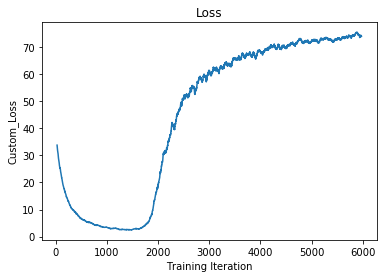

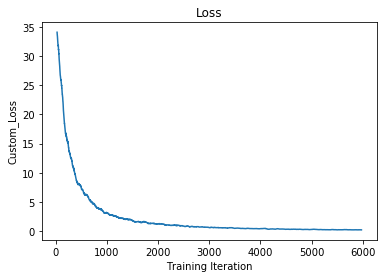

In [5]:
# Learning a kDPP

plot_floats(no_baseline.loss_dict,50,"no_baseline_loss_1e5_kDPP.pdf","Loss","Training Iteration", "Custom_Loss")
plot_floats(baseline.loss_dict,50,"baseline_loss_1e5_kDPP.pdf","Loss","Training Iteration", "Custom_Loss")

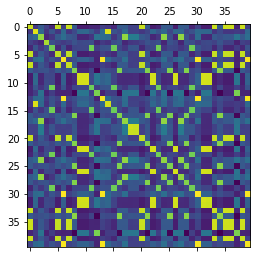

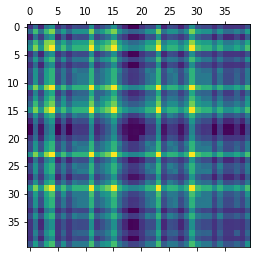

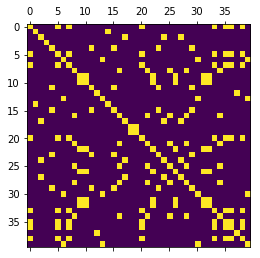

In [25]:
from dpp_nets.helper.plotting import plot_embd, gen_matrix_from_cluster_ix, plot_matrix
from torch.autograd import Variable
words, context, target = baseline.generate(1)
x = Variable(torch.cat([words, context],dim=2)).squeeze(0)
embd = baseline.kernel_net(x).data
plot_embd(x.data)
plot_embd(embd)
plot_matrix(gen_matrix_from_cluster_ix(target))

In [4]:
# Learning a Filter - No Baseline

# Initialization
network_params = {'set_size': 40, 'n_clusters': 10, 'max_sig': 10}
dtype = torch.DoubleTensor
train_it = 5000
batch_size = 10
lr = 1e-5
alpha_iter = 4

torch.manual_seed(10)
no_baseline = SimFilter(network_params, dtype)

# Pre-Training Performance
print('pre-training performance (no_baseline)')
print(50 * ' ')
torch.manual_seed(99)
no_baseline.evaluate(1000)

# Training
print(50 * '-')
print('training (no_baseline)')
print(50 * ' ')
torch.manual_seed(0)
no_baseline.train(train_it, batch_size, lr, alpha_iter, False)

# Evaluation 
print(50 * '-')
print('trained network (no_baseline):')
torch.manual_seed(99)
no_baseline.evaluate(1000)
print(20 * '-')
print('random benchmark:')
torch.manual_seed(99)
no_baseline.random_benchmark(1000)

pre-training performance (no_baseline)
                                                  
Average Subset Size:  12.794000000000013
Subset Variance:  6.281563999999997
Average Loss 225.793
How much junk per sample:  10.954
How many misses per sample:  3.809
How many catches per sample: 1.84
How many signals missed totally: 0.6742786333864401
How many signals caught totally: 0.32572136661355994
--------------------------------------------------
training (no_baseline)
                                                  
Loss at it  100  is:  170.425
Loss at it  200  is:  156.875
Loss at it  300  is:  114.55
Loss at it  400  is:  113.975
Loss at it  500  is:  110.925
Loss at it  600  is:  106.3
Loss at it  700  is:  81.0
Loss at it  800  is:  105.65
Loss at it  900  is:  70.275
Loss at it  1000  is:  102.175
Loss at it  1100  is:  87.05
Loss at it  1200  is:  60.375
Loss at it  1300  is:  75.65
Loss at it  1400  is:  64.4
Loss at it  1500  is:  68.775
Loss at it  1600  is:  60.0
Loss at it  

In [5]:
# Learning a Filter - Baseline

# Initialization

torch.manual_seed(10)
baseline = SimFilter(network_params, dtype)

# Pre-Training Performance
print('pre-training performance (baseline)')
print(50 * ' ')
torch.manual_seed(99)
baseline.evaluate(1000)

# Training
print(50 * '-')
print('training (baseline)')
print(50 * ' ')
torch.manual_seed(0)
baseline.train(train_it, batch_size, lr, alpha_iter, True)

# Evaluation 
print(50 * '-')
print('trained network (baseline):')
torch.manual_seed(99)
baseline.evaluate(1000)
print(20 * '-')
print('random benchmark:')
torch.manual_seed(99)
baseline.random_benchmark(1000)

pre-training performance (baseline)
                                                  
Average Subset Size:  12.794000000000013
Subset Variance:  6.281563999999997
Average Loss 225.793
How much junk per sample:  10.954
How many misses per sample:  3.809
How many catches per sample: 1.84
How many signals missed totally: 0.6742786333864401
How many signals caught totally: 0.32572136661355994
--------------------------------------------------
training (baseline)
                                                  
Loss at it  100  is:  186.875
Loss at it  200  is:  173.875
Loss at it  300  is:  137.325
Loss at it  400  is:  141.725
Loss at it  500  is:  124.275
Loss at it  600  is:  147.85
Loss at it  700  is:  104.025
Loss at it  800  is:  129.85
Loss at it  900  is:  122.825
Loss at it  1000  is:  88.25
Loss at it  1100  is:  86.225
Loss at it  1200  is:  96.425
Loss at it  1300  is:  95.0
Loss at it  1400  is:  129.075
Loss at it  1500  is:  83.3
Loss at it  1600  is:  103.45
Loss at it 

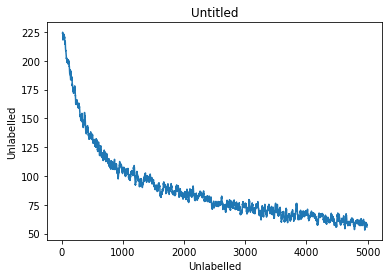

In [8]:
plot_floats(baseline.loss_dict,20)

In [9]:
torch.manual_seed(22)
no_baseline.train(train_it, batch_size, lr, alpha_iter, False)
torch.manual_seed(22)
baseline.train(train_it, batch_size, lr, alpha_iter, True)



Loss at it  100  is:  49.825
Loss at it  200  is:  37.2
Loss at it  300  is:  29.5
Loss at it  400  is:  42.3
Loss at it  500  is:  36.775
Loss at it  600  is:  40.0
Loss at it  700  is:  45.4
Loss at it  800  is:  40.8
Loss at it  900  is:  34.625
Loss at it  1000  is:  45.5
Loss at it  1100  is:  35.5
Loss at it  1200  is:  44.1
Loss at it  1300  is:  42.2
Loss at it  1400  is:  43.6
Loss at it  1500  is:  44.5
Loss at it  1600  is:  44.4
Loss at it  1700  is:  44.8
Loss at it  1800  is:  9.6
Loss at it  1900  is:  24.3
Loss at it  2000  is:  37.8
Loss at it  2100  is:  41.8
Loss at it  2200  is:  46.8
Loss at it  2300  is:  42.0
Loss at it  2400  is:  44.0
Loss at it  2500  is:  35.1
Loss at it  2600  is:  19.0
Loss at it  2700  is:  37.9
Loss at it  2800  is:  32.1
Loss at it  2900  is:  24.9
Loss at it  3000  is:  18.6
Loss at it  3100  is:  30.4
Loss at it  3200  is:  36.4
Loss at it  3300  is:  32.7
Loss at it  3400  is:  41.7
Loss at it  3500  is:  47.2
Loss at it  3600  is:  3

In [10]:
torch.manual_seed(99)
no_baseline.evaluate(1000)
torch.manual_seed(99)
baseline.evaluate(1000)

Average Subset Size:  0.0
Subset Variance:  0.0
Average Loss 39.419
How much junk per sample:  0.0
How many misses per sample:  5.607
How many catches per sample: 0.0
How many signals missed totally: 1.0
How many signals caught totally: 0.0
Average Subset Size:  1.0920000000000003
Subset Variance:  0.24953600000000012
Average Loss 45.989
How much junk per sample:  0.955
How many misses per sample:  5.218
How many catches per sample: 0.137
How many signals missed totally: 0.9744164332399626
How many signals caught totally: 0.025583566760037348
